In [2]:
!pip install wordcloud-fa hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 725.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.3 MB/s eta 0:00:0000:010:01m
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=3210acc770c439cd34c0a411e0fe46c316705f761cc13323c319bdba5cbab387
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=192772 sha256=1cdbb8833c824c2f1d3da2ff692034031e051aed66f7c3cbc250b3d1941eaf2a
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Atte

In [3]:
import numpy as np 
import pandas as pd 
import os
from wordcloud_fa import WordCloudFa
from hazm import stopwords_list
from hazm import Normalizer, word_tokenize
import regex as re

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/because-of/Because_of_14-30Sept.csv


In [5]:
data =  pd.read_csv('/kaggle/input/because-of/Because_of_14-30Sept.csv')
data.head()

,text,display_name,Timestamp,retweet_count,favorite_count,reply_count,quote_count,media_1,media_2,media_3,media_4
0,برای هر باری که آرزو کردیم ایران به دنیا نمیوم...,marcellasne,Sat Sep 24 01:15:20 +0000 2022,0,0,0,0,NaN,NaN,NaN,NaN
1,برای پسرایی که اجباری میرن سربازی و بهشون تجاو...,مُلحدِ زلال پرست,Fri Sep 23 20:49:43 +0000 2022,13,13,0,0,NaN,NaN,NaN,NaN
2,برای خیلی از عزیزانی که ،عمرشان تلف شد و،از مس...,G. shakeri,Fri Sep 23 22:16:26 +0000 2022,4,6,0,0,NaN,NaN,NaN,NaN
3,برای مهسا ،برای ایران،#مهسا_امینی،#Mahsa_Amini...,گابلر,Fri Sep 23 20:44:06 +0000 2022,0,0,0,0,NaN,NaN,NaN,NaN
4,برای همه اون جوون های بهایی،مسیحی،زرتشت... که ...,Violet Djawadi,Sun Sep 25 21:39:56 +0000 2022,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,retweet_count,favorite_count,reply_count,quote_count
count,971947.000000,971947.000000,971947.000000,971947.00000
mean,15.292311,28.800155,1.878161,0.23164
std,397.355022,853.489656,64.750463,8.06796
min,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.00000
50%,0.000000,1.000000,0.000000,0.00000
75%,2.000000,5.000000,0.000000,0.00000
max,66640.000000,234997.000000,20080.000000,2108.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971947 entries, 0 to 971946
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            971947 non-null  object
 1   display_name    971912 non-null  object
 2   Timestamp       971947 non-null  object
 3   retweet_count   971947 non-null  int64 
 4   favorite_count  971947 non-null  int64 
 5   reply_count     971947 non-null  int64 
 6   quote_count     971947 non-null  int64 
 7   media_1         45613 non-null   object
 8   media_2         2067 non-null    object
 9   media_3         762 non-null     object
 10  media_4         461 non-null     object
dtypes: int64(4), object(7)
memory usage: 81.6+ MB


In [8]:
hashtag = lambda s: ' '.join(i for i in s.split() if '#' not in i)

In [9]:
def filter_stopwords(input_tokens):
    return [token for token in input_tokens if token not in stopwords_set]

text = data['text'].str.cat(sep=' ')
text = hashtag(text)

In [10]:
stopwords_set = set(stopwords_list())
stopwords_set

{'آخرین',
 'آقای',
 'آمد',
 'آمده',
 'آمده_است',
 'آن',
 'آنان',
 'آنجا',
 'آنها',
 'آنچه',
 'آنکه',
 'آورد',
 'آوری',
 'آیا',
 'ابتدا',
 'اثر',
 'اجرا',
 'اخیر',
 'از',
 'است',
 'اش',
 'اغلب',
 'افراد',
 'افرادی',
 'افزود',
 'البته',
 'اما',
 'امر',
 'امکان',
 'اند',
 'او',
 'اول',
 'اولین',
 'اکنون',
 'اگر',
 'ایشان',
 'این',
 'اینجا',
 'اینکه',
 'با',
 'بار',
 'باره',
 'باز',
 'باشد',
 'باشند',
 'باعث',
 'بالا',
 'باید',
 'بخش',
 'بخشی',
 'بدون',
 'بر',
 'برابر',
 'براساس',
 'برای',
 'برخی',
 'برداری',
 'بروز',
 'بزرگ',
 'بسیار',
 'بسیاری',
 'بعد',
 'بعضی',
 'بلکه',
 'بنابراین',
 'بندی',
 'به',
 'بهتر',
 'بهترین',
 'بود',
 'بودن',
 'بودند',
 'بوده',
 'بوده_است',
 'بی',
 'بیان',
 'بیرون',
 'بیش',
 'بیشتر',
 'بیشتری',
 'بین',
 'تا',
 'تاکنون',
 'تبدیل',
 'تحت',
 'ترتیب',
 'تعداد',
 'تعیین',
 'تغییر',
 'تمام',
 'تمامی',
 'تنها',
 'تهیه',
 'تو',
 'جا',
 'جاری',
 'جای',
 'جایی',
 'جدی',
 'جدید',
 'جریان',
 'جز',
 'جمع',
 'جمعی',
 'حال',
 'حالا',
 'حالی',
 'حتی',
 'حد',
 'حداقل',
 'حدود',

In [12]:
e = ("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
     "]+")
allemojies = set()
def removeEmojies(text):
    duplemoj = re.compile('(' + e + '){2,}|((' + e + r')\s+)' '{2,}', re.UNICODE)
    return duplemoj.sub('', text)

In [13]:
punctuation = "?.؟!،,"
normalizer = Normalizer()
def preprocessing(item):
    output = normalizer.normalize(item)
    output = output.replace("\_", "\u200c")
#     output = output.replace("\u200c", "")
    output = re.sub(r"LINK([^ ])*|TAG|ID|\-|@|LINK|[A-Za-z]", "", output)
    for i in punctuation:
        p = "\\" + i + "{2,}"
        output = re.sub(p, i, output)
#     output = re.sub("\?|\.|\؟|\!|\،|\,", "", output)
    output = removeEmojies(output)
    emoj = re.compile(e)
    for i in emoj.findall(output):
        allemojies.add(i)
    output = re.sub("\s+", " ", output).strip()
    return output

clean_txt = preprocessing(text)

In [25]:
addition = {'،','»','«','...','ک','یه','اون','[',']','.','','(',')','دیگه','تک','!','توی'}
stopwords_set.update(addition)

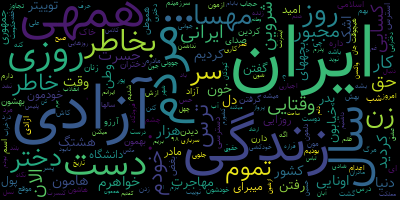

In [26]:
wordcloud = WordCloudFa(collocations=False, stopwords=stopwords_set)
frequencies = wordcloud.process_text(clean_txt)
wc = wordcloud.generate_from_frequencies(frequencies)
wc.to_image()